164.16801532552705


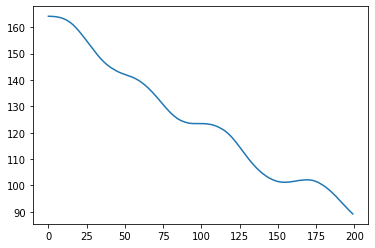

In [15]:
import numpy as np
from scipy.fft import fft
from scipy.interpolate import griddata
import cmath as cm
import matplotlib.pyplot as plt

data = '/Users/danielblock/Desktop/Duke/Sophomore Year/RTG/REU_Model_run_200x512x512.npy'
res = 512

def initial(x):
    ini = np.ones((res, res))
       #ini1, ini2 = np.meshgrid(np.linspace(1,1,512), np.linspace(1,1,512))
    for i in range(res):
        if i >= res/2:
            ini[i] = 0.
                #ini2[i] = 0.
    return ini

def h1(data, t, res):
    #t must be less than the total number of timesteps
    # define grid points
    data = np.load(data)
    data1 = data[t][0]
    data2 = data[t][1]
    datanew = initial(data1).flatten()
    x, y = np.meshgrid(np.linspace(0, 1, res), np.linspace(0, 1, res))
    dn = griddata((data1.flatten(), data2.flatten()), (datanew), (x, y), 'nearest').reshape(res,res)
    # take fft of the points
    data_ff = np.fft.fft2(dn-np.mean(dn))
    xn = np.zeros((res,res))
    # divide them by sqrt of j^2 + k^2 (where j and k are the indices of the array of grid points)
    for j in range(res):
        for k in range(res):
            if (j**2+k**2 != 0):
                xn[j,k] = abs(data_ff[j, k] / cm.sqrt((j**2) + (k**2)))
            if (j==0 & k == 0):
                xn[0,0] = abs(data_ff[0,0])
    #this does skip the pair (0,0), which stays at zero, so i just added the original data_ff(0,0) unchanged
    # square points, sum them all, and take sqrt again
    xn1 = xn**2
    #xn1 is a two dimensional array, NxN based on dimensions of the grid
    x2 = sum(sum(xn1))/(res**2)
    #total sum of all NxN elements
    xf = np.sqrt(x2)
    return xf


h1norms = h1(data, 0, 512)
print(h1norms)

Scale = np.empty(200)
for t in range(200):
    Scale[t] = h1(data, t, res)
    
plt.plot(Scale)
plt.show()

'/Users/danielblock/Desktop/Duke/Sophomore Year/RTG/REU_Model_run_200x512x512.npy'